In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
from sklearn import metrics

In [2]:
data = pd.read_csv("Credit_Risk_Train_data.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.dtypes            # Credit History has datatype float64, we have to convert it into object.

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# 1. Preprocessing

In [5]:
# Getting the unique values
for val in data:
    print(val, " ", data[val].unique().shape)

Loan_ID   (614,)
Gender   (3,)
Married   (3,)
Dependents   (5,)
Education   (2,)
Self_Employed   (3,)
ApplicantIncome   (505,)
CoapplicantIncome   (287,)
LoanAmount   (204,)
Loan_Amount_Term   (11,)
Credit_History   (3,)
Property_Area   (3,)
Loan_Status   (2,)


### Remove the variables having unique values

In [6]:
# Variable name "Loan_ID" having unique values so we can delete it.
data.drop("Loan_ID", axis=1, inplace = True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Convert Credit_History variable to categorical from numeric

In [7]:
data["Credit_History"] = data["Credit_History"].astype("object")
data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

### # Convert Loan status variable content from Yes/No to 0-1

In [8]:
data.Loan_Status.replace(('N', 'Y'), (0,1), inplace = True)
data["Loan_Status"] = data["Loan_Status"].astype("object")
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,1


In [9]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
 # Counting the frequency of variables to check the biasness
for val in data:
    if data[val].dtypes == "object":
        print(data[val].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
1    422
0    192
Name: Loan_Status, dtype: int64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


### Null values treatment

In [12]:
# Dealing with NA values
data.isna().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [13]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# Percentage of NA values
for val in data:
    print(val, " ", (data[val].isna().sum() / data.shape[0]) * 100)

Gender   2.1172638436482085
Married   0.4885993485342019
Dependents   2.44299674267101
Education   0.0
Self_Employed   5.211726384364821
ApplicantIncome   0.0
CoapplicantIncome   0.0
LoanAmount   3.5830618892508146
Loan_Amount_Term   2.2801302931596092
Credit_History   8.143322475570033
Property_Area   0.0
Loan_Status   0.0


In [15]:
# Number of rows getting affected by NA values
no_of_rows = data[data.isna().sum(axis=1) >= 1].shape[0]
no_of_rows

134

In [16]:
# % of number of rows getting affected by NA values
print((no_of_rows / data.shape[0]) * 100)

21.824104234527688


In [17]:
# Columnwise NA values
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Impute null values by mean / mode

In [18]:
#  In such a case we have to impute Na's : Imputation according to data type
def imputenull(data):
    for col in data.columns:
        if data[col].dtypes == 'int64' or data[col].dtypes == 'float64':
            data[col].fillna((data[col].mean()), inplace=True)
        else:
            data[col].fillna(data[col].value_counts().index[0], inplace=True)


imputenull(data)

In [19]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Bar plot for target variable

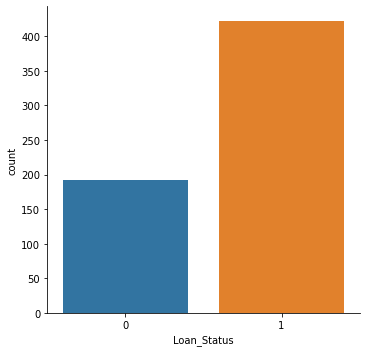

In [20]:
sns.catplot(x="Loan_Status", kind="count", data=data)

In [21]:
# Training and testing split data
tar_var = data["Loan_Status"]
tar_var

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [22]:
data.drop("Loan_Status", axis=1, inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban


# 2. Hot Encoding

In [23]:
# Converting in dummies
data_num = data.select_dtypes(include=['int64', 'float64'])
data = pd.get_dummies(data, drop_first=False)
print(data.shape)
print(data)

(614, 20)
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162             360.0   
1               4583             1508.0  128.000000             360.0   
2               3000                0.0   66.000000             360.0   
3               2583             2358.0  120.000000             360.0   
4               6000                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609             2900                0.0   71.000000             360.0   
610             4106                0.0   40.000000             180.0   
611             8072              240.0  253.000000             360.0   
612             7583                0.0  187.000000             360.0   
613             4583                0.0  133.000000             360.0   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0               1.0              0   

In [24]:
# Converting categorical / dummies variable into factor.
lst = data_num.columns
for val in data:
    if(val not in lst):
        data[val] = data[val].astype("object")

In [25]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Female            614 non-null    object 
 6   Gender_Male              614 non-null    object 
 7   Married_No               614 non-null    object 
 8   Married_Yes              614 non-null    object 
 9   Dependents_0             614 non-null    object 
 10  Dependents_1             614 non-null    object 
 11  Dependents_2             614 non-null    object 
 12  Dependents_3+            614 non-null    object 
 13  Education_Graduate       614 non-null    object 
 14  Education_Not Graduate   6

### Sampling 

In [27]:
#Spliting now.
x_train,x_test,y_train,y_test = train_test_split(data, tar_var, random_state = 15, test_size = 0.3)

In [28]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
42,2400,0.0,75.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
602,5703,0.0,128.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
348,6333,4583.0,259.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
493,17263,0.0,225.0,360.0,1.0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0
111,2929,2333.0,139.0,360.0,1.0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2366,2531.0,136.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
199,11000,0.0,83.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1
156,6000,0.0,160.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
384,4566,0.0,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [29]:
x_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
44,4695,0.0,96.000000,342.0,1.0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
305,2000,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
499,6283,4416.0,209.000000,360.0,0.0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0
192,6033,0.0,160.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
489,2435,0.0,75.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,5821,0.0,144.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
411,6256,0.0,160.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
526,3775,0.0,110.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
93,4133,0.0,122.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0


In [30]:
y_train

42     1
602    1
348    1
493    1
111    1
      ..
85     1
199    0
156    1
384    0
456    1
Name: Loan_Status, Length: 429, dtype: int64

In [31]:
y_test

44     1
305    0
499    0
192    0
489    0
      ..
47     1
411    1
526    1
93     1
35     1
Name: Loan_Status, Length: 185, dtype: int64

### Logistic Regression model creation

In [32]:
# create logistic regression object
reg = lm.LogisticRegression()

### Apply the model

In [33]:
# train the model using the training sets
reg.fit(x_train, y_train)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction for Loan status (1 = 'Loan Pass', 0 = 'Loan not Pass')

In [34]:
# making predictions on the testing set
y_pred = reg.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
# Comparision of Actual values and predicted values
metrics = {"Y_Actual":list(y_test), "Y_Predicted":list(y_pred)}
metrics

{'Y_Actual': [1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'Y_Predicted': [1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  

In [36]:
# Creating metrics as dataframe
metrics = pd.DataFrame(metrics, columns=["Y_Actual", "Y_Predicted"])
metrics

,Y_Actual,Y_Predicted
0,1,1
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
180,1,1
181,1,1
182,1,1
183,1,1


### Confusion Matrix

In [37]:
Confusion= pd.crosstab(metrics["Y_Actual"], metrics["Y_Predicted"], rownames = ["Y_Actual"])
Confusion

Y_Predicted,0,1
Y_Actual,,
0,32,34
1,1,118


In [38]:
TP = Confusion.iloc[1, 1];print(TP)
TN = Confusion.iloc[0, 0];print(TN)
FP = Confusion.iloc[0, 1];print(FP)
FN = Confusion.iloc[1, 0];print(FN)

118
32
34
1


In [39]:
from sklearn import metrics
confusion_1 = metrics.confusion_matrix(y_test, y_pred)
confusion_1

array([[ 32,  34],
       [  1, 118]], dtype=int64)

### Accuracy of the model

In [40]:
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred) * 100)
print("Accuracy:", (TP + TN) / float(TP + TN + FP + FN)) 

Logistic Regression model accuracy(in %): 81.08108108108108
Accuracy: 0.8108108108108109


### Classification Error

In [41]:
classification_error = (FP + FN) / float(TP + TN + FP + FN) #Error
print("Classification Error (in%):", classification_error*100)
print("Error:", 1 - metrics.accuracy_score(y_test, y_pred))

Classification Error (in%): 18.91891891891892
Error: 0.18918918918918914


### Sensitivity / Recall / TPR of the model

In [42]:
from sklearn.metrics import recall_score
tpr = sensitivity = TP / float(FN + TP)
print("Sensitivity:", sensitivity)
print(recall_score(y_test, y_pred))

Sensitivity: 0.9915966386554622
0.9915966386554622


### Specificity of the model

In [43]:
specificity = TN / (TN + FP)
print("Specificity:", specificity)

Specificity: 0.48484848484848486


### FPR of the model

In [44]:
false_positive_rate = FP / float(TN + FP)
print("FPR:", false_positive_rate)
print(1 - specificity)

FPR: 0.5151515151515151
0.5151515151515151


### Precision of the model

In [45]:
precision = TP / float(TP + FP)
print("Precision:", precision)
print(metrics.precision_score(y_test, y_pred))

Precision: 0.7763157894736842
0.7763157894736842


### ROC curve

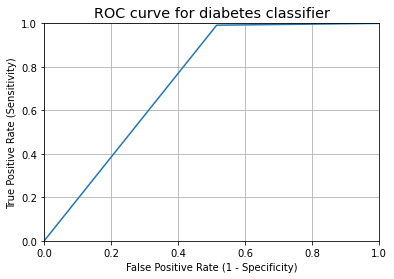

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Area under curve value

In [47]:
"""AUC - Area under Curve"""

# AUC is the percentage of the ROC plot that is underneath the curve:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred))


0.7382225617519735


### F1 score of the model

In [48]:
# F1 Score FORMULA
F1 = 2 * (precision * sensitivity) / (precision + sensitivity)
F1

0.8708487084870848

### Cross validated AUC under only for logistics

In [49]:
# Calculate cross-validated AUC only for logistics
from sklearn.model_selection import cross_val_score
cross_val_score(reg, x_train, y_train, cv=10, scoring='roc_auc').mean()

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7314957264957265